In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

1.14.0


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [2]:
bos = datasets.load_boston()

In [3]:
bos

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
x = pd.DataFrame(bos['data'])

In [5]:
x.columns=bos['feature_names']

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = bos['target']

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0275938190 and adding -0.047737


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

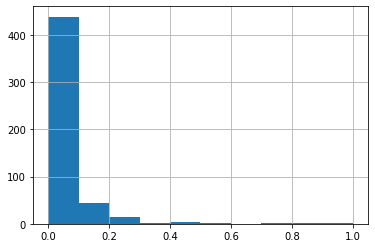

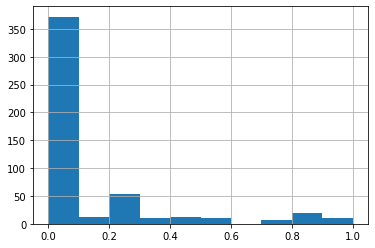

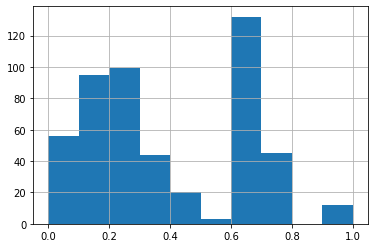

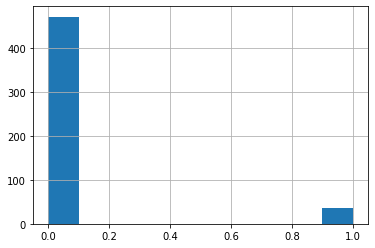

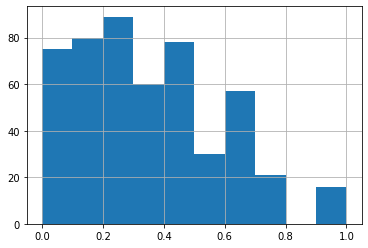

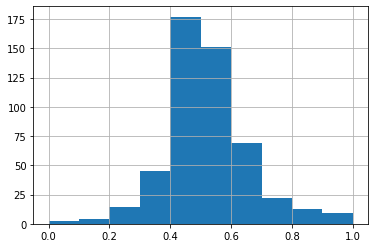

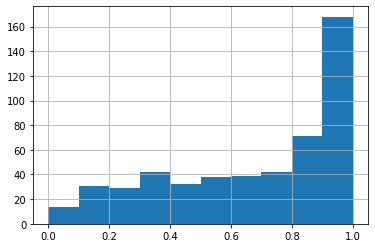

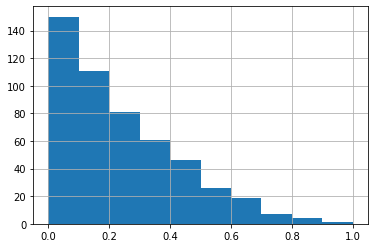

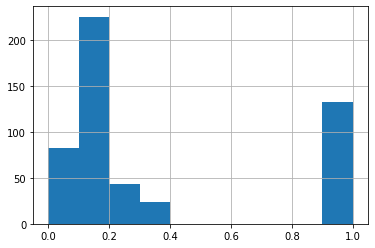

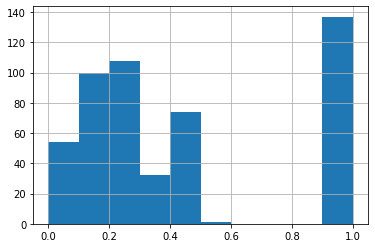

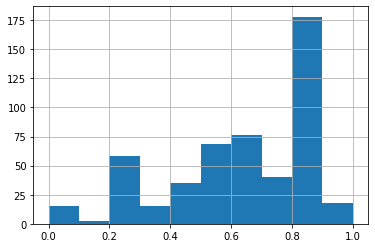

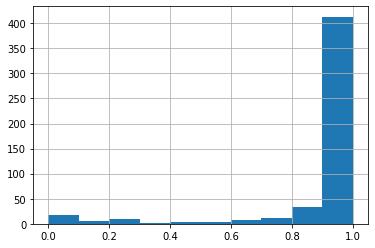

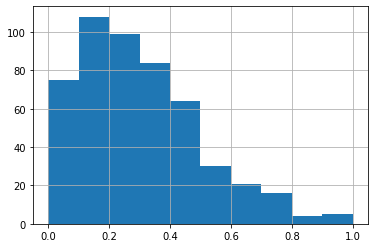

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [12]:
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1))



W0725 19:26:35.565966  6336 deprecation.py:506] From C:\Users\shonm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [13]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

## Fit model
Now it is time to train

In [14]:
model.fit(scaled_train_df.values, y, epochs=10, batch_size=32)

Epoch 1/10


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(32, 13), b.shape=(13, 10), m=32, n=10, k=13
	 [[{{node sequential/dense/MatMul}}]]
	 [[loss/mul/_45]]
  (1) Internal: Blas GEMM launch failed : a.shape=(32, 13), b.shape=(13, 10), m=32, n=10, k=13
	 [[{{node sequential/dense/MatMul}}]]
0 successful operations.
0 derived errors ignored.

## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser

In [ ]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [ ]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [ ]:
model.fit(scaled_train_df.values, y, epochs=100, batch_size=20, callbacks=[tb])

## Validate!!
SO far we have used the entire dataset to train.  We know that Prof Slater frown upon this.  In Neural Networks, rahter than a cross validation, a validation split is done.  Lets repeat the experiment with splits


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

In [ ]:
model_final = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [ ]:
model_final.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [ ]:
model_final.fit(x_train.values, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=20, callbacks=[tb])

## Classification?
The only thing we really need to change is the final layer to predict classes

In [ ]:
model_iris = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(3 ,activation='sigmoid'),)

model_iris.compile(optimizer=tf.train.GradientDescentOptimizer(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
iris = datasets.load_iris()

In [ ]:
x= iris['data']
y = iris['target']
# Why do I not have to scale?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1776)

In [ ]:
model_iris.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[tb])

In [ ]:
np.argmax(model_iris.predict(x_test),axis=1)

In [ ]:
y_test